In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading Dataset 

df=pd.read_csv("C:\\Users\\vamsi\\OneDrive\\Desktop\\Vamshi Data\\Supplychain train dataset.csv")

In [3]:
#Checking missing values:
df.isnull().sum().T

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [4]:
df1=df.copy()
df1.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [5]:
df1.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [6]:
# Missing Values Imputation 

In [7]:
df1['workers_num'].fillna(df1['workers_num'].median(),inplace=True)

In [8]:
df1['workers_num'].median()

28.0

In [9]:
df1['wh_est_year'].fillna(df1['wh_est_year'].median(),inplace=True)

In [10]:
df1['wh_est_year'].median()

2009.0

In [11]:
df1['approved_wh_govt_certificate'].fillna(df1['approved_wh_govt_certificate'].mode()[0],inplace=True)

In [12]:
df1['approved_wh_govt_certificate'].mode()

0    C
dtype: object

In [13]:
df1.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

# Outlinear Detection :

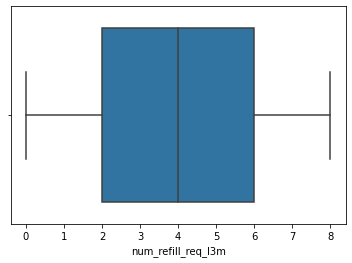

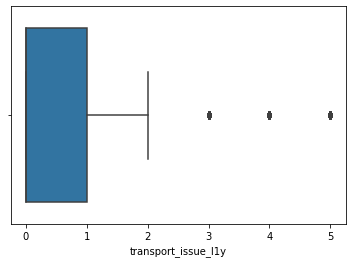

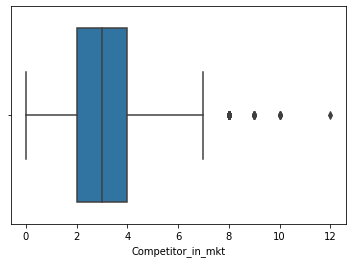

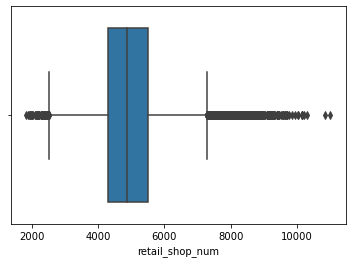

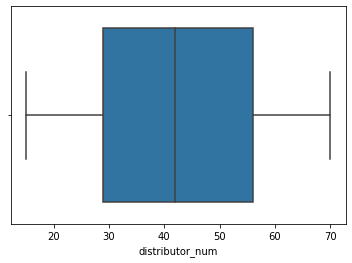

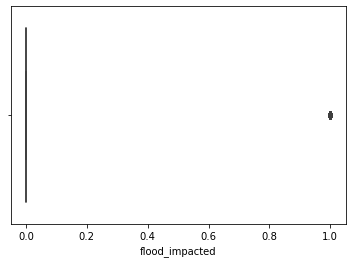

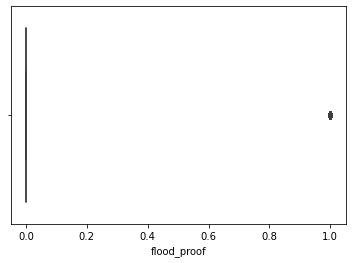

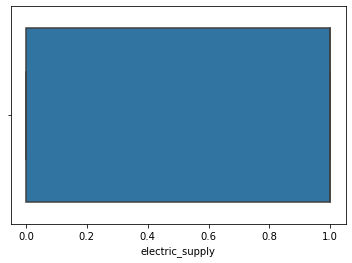

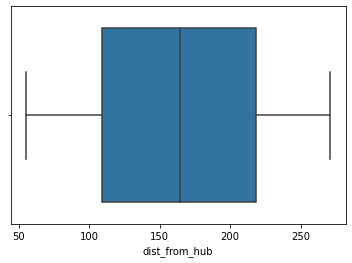

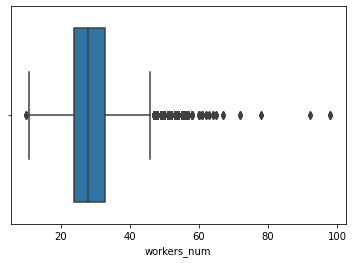

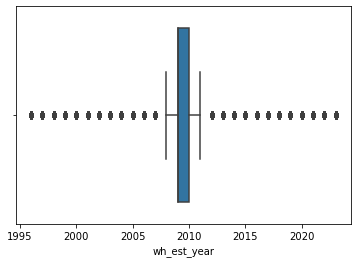

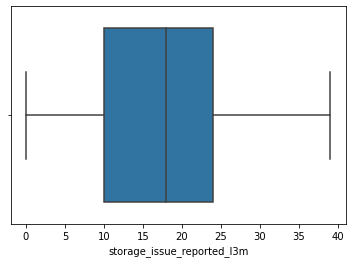

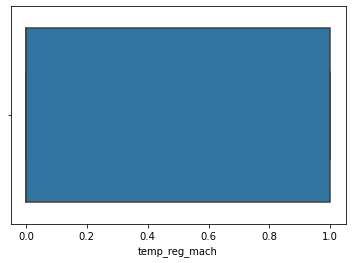

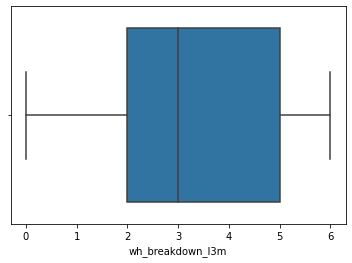

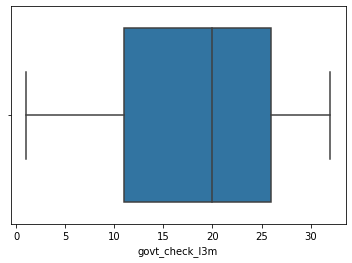

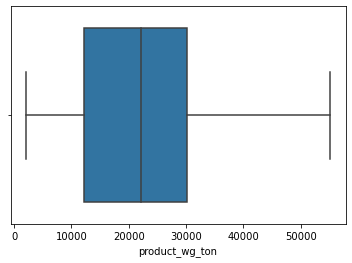

In [14]:
for col in df1.describe().columns:
    sns.boxplot(df1[col])
    plt.show()

In [15]:
col_sel=['transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num','flood_impacted','flood_proof','workers_num','wh_est_year']
def iqr_capping(df1, cols, factor):
    
    for col in cols:
        
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df1[col] = np.where(df1[col]>upper_whisker, upper_whisker,
                 np.where(df1[col]<lower_whisker, lower_whisker, df1[col]))


iqr_capping(df1, col_sel, 1.5)

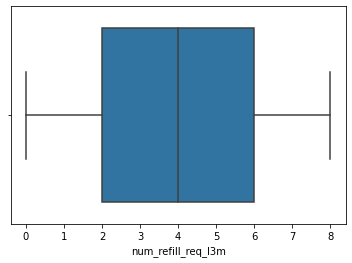

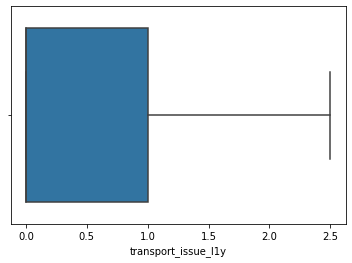

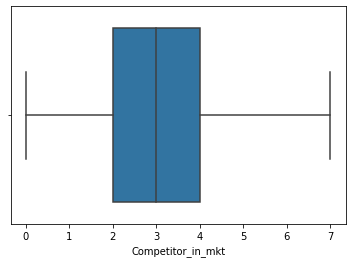

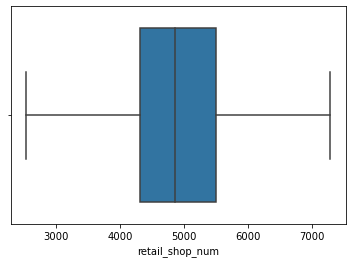

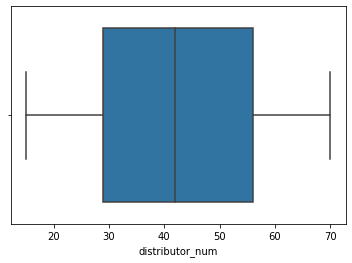

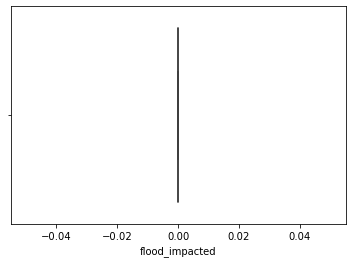

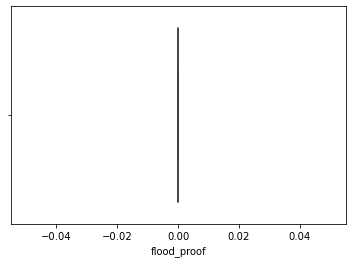

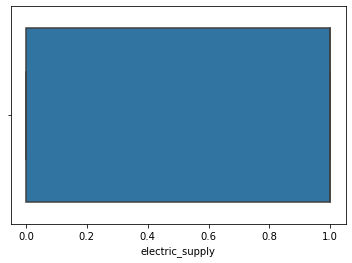

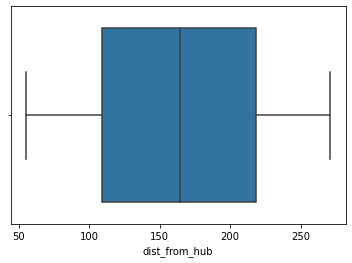

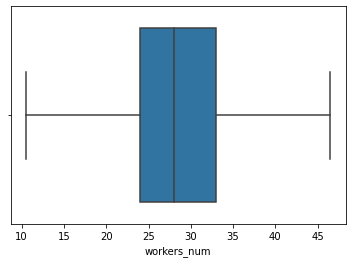

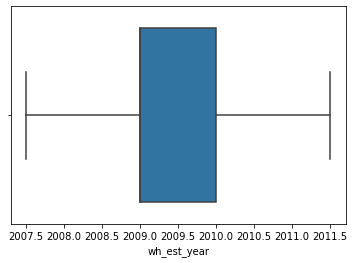

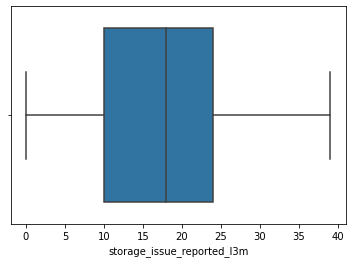

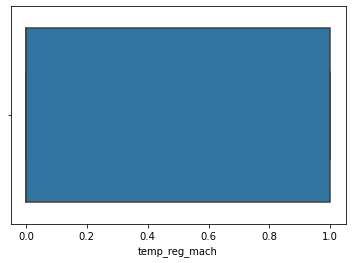

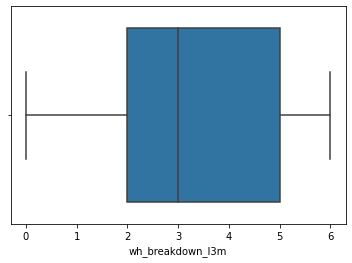

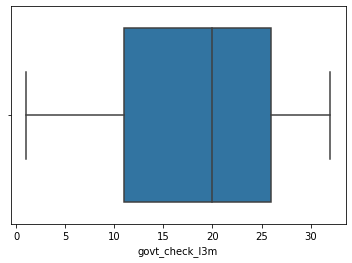

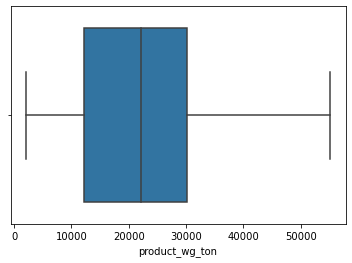

In [16]:
#Removed outliers:
for col in df1.describe().columns:
    sns.boxplot(df1[col])
    plt.show()

# Feature Engineering


# temp_reg_mach:

In [17]:
df1['New_temp_reg_mach']=(df1['temp_reg_mach']+df1['electric_supply'])

In [18]:
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df1['New_temp_reg_mach'],df1['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   9255.6
p_value: 0.014825
dof_value:  8962


In [19]:
#two sample Z test:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df1['New_temp_reg_mach'],df1['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.014825195086628745


# Drop:
Drop the feature due to p value less than Alpha Value
No need to create new column.

In [20]:
df1=df1.drop(['New_temp_reg_mach'],axis=1)

# approved_wh_govt_certificate:

In [21]:
df1['New_approved_wh_govt_cert']=(df1['approved_wh_govt_certificate']+df1['WH_regional_zone'])

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

new=ols('product_wg_ton ~ New_approved_wh_govt_cert',data=df1).fit()
Anova=sm.stats.anova_lm(new,typ=2)

In [23]:
Anova

,sum_sq,df,F,PR(>F)
New_approved_wh_govt_cert,1.661289e+11,29.0,44.812245,1.177014e-247
Residual,2.827715e+12,22120.0,NaN,NaN


In [24]:
# approved_wh_govt_certificate feature we can drop beacuse p_value less than Alpha value

# Drop

In [25]:
df1=df1.drop(['New_approved_wh_govt_cert'],axis=1)

# Location_type

In [26]:
df1['New_Location_type']=(df1['Location_type']+df1['zone']+df1['WH_regional_zone'])

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

new=ols('product_wg_ton ~ New_Location_type',data=df1).fit()
Anova=sm.stats.anova_lm(new,typ=2)

In [28]:
Anova

,sum_sq,df,F,PR(>F)
New_Location_type,2.318918e+10,45.0,3.834348,9.573998e-17
Residual,2.970655e+12,22104.0,NaN,NaN


# Drop :
    P Value less than the Alpha value.
    
    No need to create new column.

In [29]:
df1=df1.drop(['New_Location_type'],axis=1)

# wh_est_year

In [30]:
df1['New_wh_est_year']=(df1['wh_est_year']+df1['workers_num'])

In [31]:
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df1['New_wh_est_year'],df1['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   3.4497e+05
p_value: 1
dof_value:  3.4952e+05


In [32]:
#two sample Z test:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df1['New_wh_est_year'],df1['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.9999999767161948


# Keep:
    We can keep the feature because p value greater than Alpha value

# storage_issue_reported_l3m

In [33]:
df1['New_Storage_issues']=(df1['storage_issue_reported_l3m']+df1['num_refill_req_l3m'])

In [34]:
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df1['New_Storage_issues'],df1['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   3.6794e+05
p_value: 0
dof_value:  2.1061e+05


In [35]:
#two sample Z test:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df1['New_Storage_issues'],df1['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.0


# Drop:
    p value less than Alpha Value. 
    
    NO use of creating new column.

In [36]:
df1=df1.drop(['New_Storage_issues'],axis=1)

# wh_breakdown_l3m

In [37]:
df1['New_Wh_breakdown']=(df1['wh_breakdown_l3m']+df1['govt_check_l3m'])

In [38]:
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df1['New_Wh_breakdown'],df1['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   1.6637e+05
p_value: 0.15969
dof_value:  1.658e+05


In [39]:
#two sample Z test:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df1['New_Wh_breakdown'],df1['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.15969200302684997


# keep:
We can keep the feature because p value greater than Alpha value

In [40]:
df1.shape

(22150, 26)

# 3. Data Preparation
Data Preparation Let's now prepare the data and build the model.

In [41]:
df1.select_dtypes(include = ['object']).columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [42]:
df1.select_dtypes(include = ['int64','float']).columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'New_wh_est_year',
       'New_Wh_breakdown'],
      dtype='object')

In [43]:
new_df1 = pd.get_dummies(df1,columns = ['Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'], drop_first = True)

In [44]:
new_df1.drop(['Ware_house_ID','WH_Manager_ID'],axis=1,inplace=True)

In [45]:
new_df1.head(10)

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1.0,2.0,4651.0,24.0,0.0,0.0,1,91,29.0,...,0,0,0,0,1,1,0,0,0,0
1,0,0.0,4.0,6217.0,47.0,0.0,0.0,1,210,31.0,...,0,0,0,1,0,0,0,0,0,0
2,1,0.0,4.0,4306.0,64.0,0.0,0.0,0,161,37.0,...,1,0,0,0,0,0,0,0,0,0
3,7,2.5,2.0,6000.0,50.0,0.0,0.0,0,103,21.0,...,0,1,0,0,0,1,1,0,0,0
4,3,1.0,2.0,4740.0,42.0,0.0,0.0,1,112,25.0,...,0,0,0,1,0,0,0,0,0,1
5,8,0.0,2.0,5053.0,37.0,0.0,0.0,1,152,35.0,...,0,0,0,0,0,1,1,0,0,0
6,8,0.0,4.0,4449.0,38.0,0.0,0.0,1,77,27.0,...,0,0,0,0,1,0,0,1,0,0
7,1,0.0,4.0,7183.0,45.0,0.0,0.0,0,241,23.0,...,0,0,0,1,0,1,0,0,0,1
8,8,1.0,4.0,5381.0,42.0,0.0,0.0,1,124,22.0,...,0,0,0,0,1,1,1,0,0,0
9,4,2.5,3.0,3869.0,35.0,0.0,0.0,0,78,43.0,...,0,0,0,0,1,0,0,0,0,1


In [46]:
new_df1.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'New_wh_est_year',
       'New_Wh_breakdown', 'Location_type_Urban', 'WH_capacity_size_Mid',
       'WH_capacity_size_Small', 'zone_North', 'zone_South', 'zone_West',
       'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3',
       'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5',
       'WH_regional_zone_Zone 6', 'wh_owner_type_Rented',
       'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C'],
      dtype='object')

In [47]:
new_df1.shape

(22150, 34)

In [48]:
comatrix=new_df1.corr()
comatrix

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
num_refill_req_l3m,1.000000,0.020805,0.006754,-0.003651,0.005063,NaN,NaN,-0.007217,-0.000611,-0.013520,...,0.003831,0.004905,0.001357,-0.004324,0.005417,0.009968,0.003808,0.002539,0.006154,-0.011536
transport_issue_l1y,0.020805,1.000000,-0.005877,0.001571,0.002638,NaN,NaN,-0.009535,0.012688,-0.007262,...,-0.014448,0.003676,0.007813,-0.002807,-0.001129,0.002650,-0.012566,-0.004935,0.014695,-0.003892
Competitor_in_mkt,0.006754,-0.005877,1.000000,-0.162411,0.000845,NaN,NaN,-0.000716,0.011009,-0.004350,...,-0.072800,0.019859,0.056721,-0.025948,0.016855,-0.004810,-0.000725,-0.002375,-0.005628,0.000437
retail_shop_num,-0.003651,0.001571,-0.162411,1.000000,-0.005080,NaN,NaN,-0.006970,0.002491,-0.007666,...,0.016668,-0.059608,0.019795,-0.031522,0.008851,0.004131,-0.005715,0.005931,0.004265,-0.004426
distributor_num,0.005063,0.002638,0.000845,-0.005080,1.000000,NaN,NaN,-0.000763,-0.007538,-0.011227,...,-0.001834,-0.000499,0.004285,0.003992,-0.005969,0.001674,0.006939,0.003043,-0.008558,-0.002887
flood_impacted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flood_proof,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
electric_supply,-0.007217,-0.009535,-0.000716,-0.006970,-0.000763,NaN,NaN,1.000000,-0.002138,0.356225,...,-0.011537,0.010330,-0.011384,0.005704,0.003592,-0.229568,-0.004161,-0.005487,0.007462,0.001091
dist_from_hub,-0.000611,0.012688,0.011009,0.002491,-0.007538,NaN,NaN,-0.002138,1.000000,-0.014410,...,-0.000212,-0.005417,0.010443,0.001431,-0.002658,-0.000290,0.003430,0.002448,-0.004036,-0.005478
workers_num,-0.013520,-0.007262,-0.004350,-0.007666,-0.011227,NaN,NaN,0.356225,-0.014410,1.000000,...,-0.014221,0.005443,-0.015656,0.003930,0.013365,-0.194270,-0.003276,0.000890,0.001588,0.007284


<AxesSubplot:>

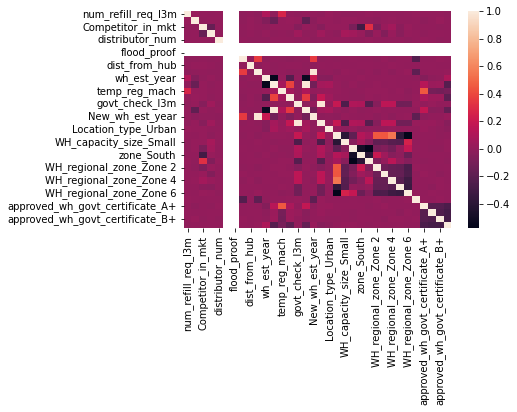

In [49]:
sns.heatmap(comatrix)

In [50]:
#x=new_df1.iloc[:, 0:35]
#y=new_df1.iloc[:, -1]

# VIF calculation
A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis.
Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results.

In [51]:
# Let's check multicollinearity 
# to calculated VIF we can use the loop
Default_indep=new_df1.loc[:,new_df1.columns!='product_wg_ton']

import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of transport_issue_l1y is 0.3603612500039106
VIF for transport_issue_l1y is 1.56
R-Sqr value of Competitor_in_mkt is 0.9094163374497056
VIF for Competitor_in_mkt is 11.04
R-Sqr value of retail_shop_num is 0.9648369590292223
VIF for retail_shop_num is 28.44
R-Sqr value of distributor_num is 0.8745747919588174
VIF for distributor_num is 7.97
R-Sqr value of flood_impacted is nan
VIF for flood_impacted is nan
R-Sqr value of flood_proof is nan
VIF for flood_proof is nan
R-Sqr value of electric_supply is 0.7090961279978787
VIF for electric_supply is 3.44
R-Sqr value of dist_from_hub is 0.8722214785424834
VIF for dist_from_hub is 7.83
R-Sqr value of workers_num is 1.0
VIF for workers_num is inf
R-Sqr value of wh_est_year is 1.0
VIF for wh_est_year is inf
R-Sqr value of storage_issue_reported_l3m is 0.8209417576143743
VIF for storage_issue_reported_l3m is 5.58
R-Sqr value of temp_reg_mach is 0.4932798035597097
VIF for temp_reg_mach is 1.97
R-Sqr value of wh_breakdown_l3m is 1.0
VIF

# We see high multicollinearity with features, can treat them with PCA or iterative metho

In [52]:
#We can reduce the multicollinearity with PCA 

from sklearn.decomposition import PCA
pca=PCA()

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scalar=StandardScaler()

scalar.fit(Default_indep)
scaled_df=scalar.transform(Default_indep)

In [55]:
# finding the PCA
PCA_result=pca.fit(scaled_df)
PCA_result.components_

array([[-2.45416328e-03, -1.40107966e-03,  4.49475725e-02, ...,
        -1.54185807e-02,  1.20095567e-03,  3.42066848e-02],
       [ 1.57637355e-03, -1.65873181e-04, -6.13664816e-03, ...,
        -1.81244164e-02, -1.54328969e-02,  1.22250303e-01],
       [ 2.17051025e-02, -6.37168007e-03,  2.14028708e-01, ...,
        -2.63497374e-02, -4.47862081e-03,  5.85664658e-02],
       ...,
       [-0.00000000e+00,  1.68933433e-16,  1.13366220e-16, ...,
        -3.06699217e-17, -9.55542172e-17, -1.78231696e-17],
       [ 0.00000000e+00, -5.02012908e-17,  1.05174936e-16, ...,
        -2.46233615e-17,  1.45483239e-16,  5.44188112e-17],
       [ 0.00000000e+00,  3.83210203e-17,  6.74682614e-18, ...,
         7.07611743e-17,  4.73861955e-17,  6.17395103e-17]])

In [56]:
PCA_result.explained_variance_

array([2.83578134e+00, 2.34282413e+00, 2.14778602e+00, 1.97815624e+00,
       1.72349406e+00, 1.59440540e+00, 1.43593777e+00, 1.30977039e+00,
       1.24427073e+00, 1.22164331e+00, 1.18021904e+00, 1.04565792e+00,
       1.03033634e+00, 1.01300906e+00, 1.00259937e+00, 9.88310257e-01,
       9.72006236e-01, 9.58627263e-01, 9.28259149e-01, 7.80673263e-01,
       7.43319381e-01, 7.22931911e-01, 5.82137308e-01, 5.28758944e-01,
       3.69850450e-01, 2.28888127e-01, 6.77265085e-02, 2.40196753e-02,
       5.59259259e-31, 1.56346006e-31, 7.24145864e-32, 1.24465131e-32,
       3.64911607e-33])

# Train Test Split

In [57]:
x = new_df1.drop('product_wg_ton',axis = 1)

In [58]:
y = new_df1['product_wg_ton']

In [59]:
x

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1.0,2.0,4651.0,24.0,0.0,0.0,1,91,29.0,...,0,0,0,0,1,1,0,0,0,0
1,0,0.0,4.0,6217.0,47.0,0.0,0.0,1,210,31.0,...,0,0,0,1,0,0,0,0,0,0
2,1,0.0,4.0,4306.0,64.0,0.0,0.0,0,161,37.0,...,1,0,0,0,0,0,0,0,0,0
3,7,2.5,2.0,6000.0,50.0,0.0,0.0,0,103,21.0,...,0,1,0,0,0,1,1,0,0,0
4,3,1.0,2.0,4740.0,42.0,0.0,0.0,1,112,25.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,8,1.0,3.0,5030.0,46.0,0.0,0.0,1,203,28.0,...,0,0,0,0,1,1,1,0,0,0
22146,3,1.0,3.0,4320.0,60.0,0.0,0.0,0,170,28.0,...,0,0,0,0,1,1,0,0,0,1
22147,7,2.0,2.0,5268.0,64.0,0.0,0.0,0,99,22.0,...,0,0,0,0,1,0,0,0,1,0
22148,6,2.0,4.0,4378.0,32.0,0.0,0.0,0,220,17.0,...,0,0,0,0,1,1,0,1,0,0


In [60]:
y

0        17115
1         5074
2        23137
3        22115
4        24071
         ...  
22145    29138
22146    33108
22147    24072
22148    15055
22149    14103
Name: product_wg_ton, Length: 22150, dtype: int64

In [61]:
#Split the data into 80% train and 20% test

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=10)

# LinearRegression:

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [64]:
lm=LinearRegression()

In [65]:
#Train Data:
lm.fit(x_train,y_train)
predit=lm.predict(x_test)

print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9850657580673705
MSE 2057507.1197886819


In [66]:
#TEST DATA:
lm.fit(x_test,y_test)
predit=lm.predict(x_test)
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9851864076481025
MSE 2040885.092873926


In [67]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predit))
print('MSE:', metrics.mean_squared_error(y_test, predit))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

MAE: 1024.7120674245873
MSE: 2040885.092873926
RMSE: 1428.595496588844


# RandomForestRegressor

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

In [69]:
model=RandomForestRegressor(n_estimators=100)

In [70]:
#Train Data:
np.random.seed(42)
model.fit(x_train,y_train)
predit=model.predict(x_test)
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9936361812975133
MSE 876750.3799977201


In [71]:
#Test Data:
np.random.seed(42)
model.fit(x_test,y_test)
predit=model.predict(x_test)
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9989324492034471
MSE 147077.66049004515


In [72]:
np.random.seed(42)
cv_r2=cross_val_score(model, x, y, cv=5, scoring=None)
np.mean(cv_r2)

0.9937256859659562

In [73]:
np.random.seed(42)
cv_r2=cross_val_score(model, x, y, cv=5, scoring="r2")
cv_r2

array([0.99370892, 0.99354695, 0.99348142, 0.99365519, 0.99423595])

# xgboost:


In [74]:
#Train Data:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train,y_train)
predit=xg.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9937820812747455
MSE 856649.5778755435


In [75]:
#Test Data:
xg.fit(x_test,y_test)
predit=xg.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9992372785391554
MSE 105080.98390147228


# DecisiontreeRegressor

In [76]:
#Train Data:
from sklearn.tree import DecisionTreeRegressor
Des= DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 0.1, random_state = 0)
Des.fit(x_train,y_train)
predit=Des.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))



R_score is  0.947720614346059
MSE 7202589.102707989


In [77]:
#Test Data:
Des.fit(x_test,y_test)
predit=Des.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9478444997912768
MSE 7185521.267144331


# BaggingRegressor

In [78]:
#Train Data:
from sklearn.ensemble import BaggingRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
predit=model.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))



R_score is  0.9937193723955801
MSE 865289.0498982393


In [79]:
#Test Data:
model.fit(x_test,y_test)
predit=model.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9989536975944778
MSE 144150.24602690744


# KNeighborsRegressor

In [80]:
#TRain Data:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train,y_train)
predit=neigh.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))


R_score is  0.5108562263354448
MSE 67389881.68634312


In [81]:
#Test Data:
neigh.fit(x_test,y_test)
predit=neigh.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.7647021076326378
MSE 32417252.311907448


In [82]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline


In [83]:
est =[]
est.append(('LinearRegression', Pipeline([('LinearRegression', LinearRegression())])))
est.append(('SGD', Pipeline([('SGD', SGDRegressor())])))
est.append(('GradientBoosting', Pipeline([('GradientBoosting',GradientBoostingRegressor())])))
est.append(('AdaBoost', Pipeline([('AdaBoost', AdaBoostRegressor())])))
est.append(('RandomForest', Pipeline([('RandomForest', RandomForestRegressor())]))) 
est.append(('Bagging', Pipeline([('Bagging', BaggingRegressor())])))
est.append(('KNeighbors', Pipeline([('KNeighbors', KNeighborsRegressor())])))
est.append(('DecisionTree', Pipeline([('DecisionTree', DecisionTreeRegressor())])))
est.append(('XGB', Pipeline([('XGB', XGBRegressor())])))

# Train Data Results:

In [84]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1],x_train,y_train, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('GradientBoosting', 0.9940612010141363),
 ('XGB', 0.99381166203322),
 ('RandomForest', 0.9936407899654954),
 ('Bagging', 0.993120966931688),
 ('DecisionTree', 0.9881044885638869),
 ('LinearRegression', 0.985959562499028),
 ('AdaBoost', 0.9765928602744766),
 ('KNeighbors', 0.5282501622384143),
 ('SGD', -1.1453895009907834e+23)]

# Test Data Results:

In [85]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1],x_test,y_test, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('GradientBoosting', 0.9933454043814187),
 ('XGB', 0.9926514741053488),
 ('RandomForest', 0.9924071032904689),
 ('Bagging', 0.9915493349731445),
 ('DecisionTree', 0.985268446179035),
 ('LinearRegression', 0.984938662027601),
 ('AdaBoost', 0.9750741954788568),
 ('KNeighbors', 0.283878842931318),
 ('SGD', -5.3013428151170114e+23)]

# model evaluation parameters 

# GradientBoosting,XGB,RandomForest:
Here I can see accuracies of all model in Regression.The best Accuracy top three models for train and test data are GradientBoosting,XGB,RandomForest.There is NO Overfitting and Underfitting in above Three models.